In [1]:
# Import necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import itertools
from sklearn import metrics
from datetime import date
from scipy import stats
from scipy.stats import norm

C:\Users\R2D2\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\R2D2\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
file = open('ultimate_data_challenge.json', 'r')
ult_df = pd.DataFrame(json.load(file))
file.close()
ult_df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [3]:
# converting to datetime
#ult_df1= ult_df.copy()
ult_df['last_trip_date'] = pd.to_datetime(ult_df['last_trip_date'])
ult_df['signup_date'] = pd.to_datetime(ult_df['signup_date'])

In [4]:
# check the time frame of the data available
end_date = max(ult_df.last_trip_date)
start_date = min(ult_df.last_trip_date)
print('start_date: ',start_date )
print('end_date: ', end_date)

start_date:  2014-01-01 00:00:00
end_date:  2014-07-01 00:00:00


In [5]:
# Calculate 30 days delta
thirty_day_delta = pd.Timedelta('30 days')
thirty_day_delta

Timedelta('30 days 00:00:00')

In [6]:
# If a user last trip is less than 30 days from end date then the user is not active
# Label these users as InActive in the dataframe
ult_df['is_active']= end_date - ult_df.last_trip_date <= thirty_day_delta
#ult_df1['is_active']= pd.Series(ult_df['is_active']).copy()

In [7]:
ult_df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,is_active
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,True
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,False
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,False
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,True
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,False


In [8]:
ult_df.is_active.value_counts()

False    31196
True     18804
Name: is_active, dtype: int64

# EDA

#### Distribution of Average Trip Distance and Number of Trips in first 30 days 

C:\Users\R2D2\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\R2D2\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


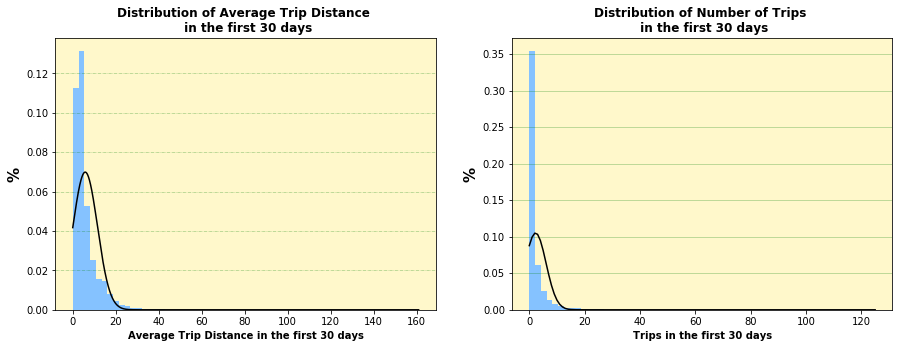

In [9]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
ax1,ax2 = ax.flatten()

ax1.set_facecolor(color='#FFF8CB')
ax1.grid(False, 'major','y', ls='-.', lw=.5, c='g', alpha=.5)

data=sorted(ult_df['avg_dist'])
fit = stats.norm.pdf(data, np.mean(data), np.std(data))

ax1.set_title('Distribution of Average Trip Distance \n in the first 30 days',weight='extra bold')
ax1.set_xlabel('Average Trip Distance in the first 30 days',weight='bold')
ax1.set_ylabel('%',fontsize=15,weight='bold')

ax1.plot(data,fit,'-', color='k')
ax1.hist(data,bins=60,normed=True,color='#85C2FF')
ax1.spines['top'].set_visible(True)


ax2.set_facecolor(color='#FFF8CB')
ax2.grid(False, 'major','y', ls='-', lw=.5, c='g', alpha=.5)

data=sorted(ult_df['trips_in_first_30_days'])
fit = stats.norm.pdf(data, np.mean(data), np.std(data)) 

ax2.set_title('Distribution of Number of Trips \n in the first 30 days',weight='extra bold')
ax2.set_xlabel('Trips in the first 30 days',weight='bold')
ax2.set_ylabel('%',fontsize=15,weight='bold')

ax2.plot(data,fit,'-', color='k')
ax2.hist(data,bins=60,normed=True,color='#85C2FF')
ax2.spines['top'].set_visible(True)


plt.show()

Above plots show the distribution of the average trip distance and the number of trips taken in the first 30 days. The distribution is skewed with most of the users taking less than 20 trips.

#### Distribution of Average Trip Distance and Number of Trips in first 30 days by city

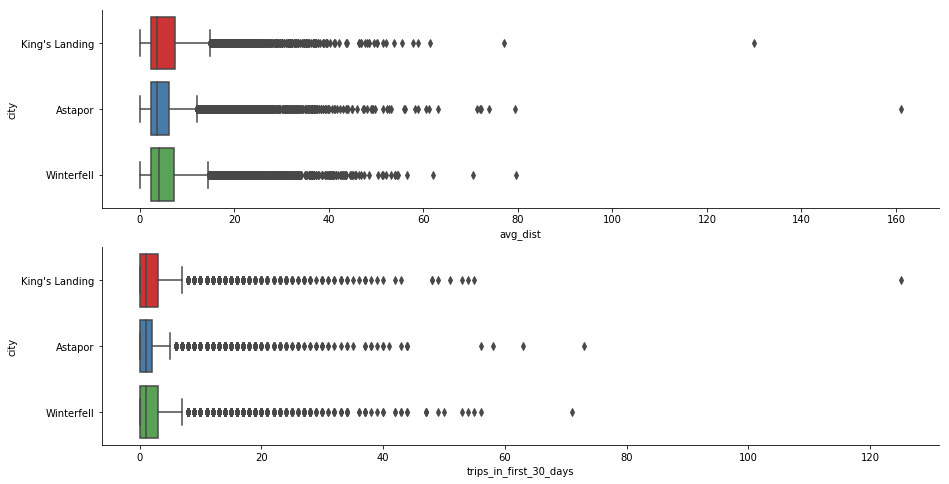

In [10]:
fig,ax=plt.subplots(nrows=2,ncols=1,figsize=(15,8))
ax1,ax2 = ax.flatten()
ax= sns.boxplot(y='city',x='avg_dist', data=ult_df, palette='Set1',ax=ax1)
ax= sns.boxplot(y='city',x='trips_in_first_30_days', data=ult_df, palette='Set1',ax=ax2)
sns.despine()

Above two plots show the distribution of the number of trips taken in the first 30 days and average distance of the trip per city. it is clear that there are less rides taken in Astop than King's Landing and Winterfall.

#### Distribution of Average Trip Distance and Number of Trips in first 30 days by user's phone type

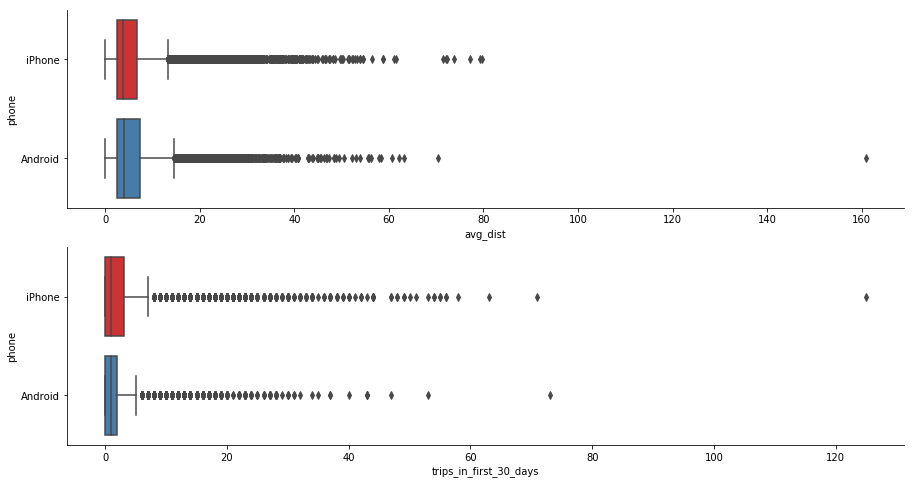

In [11]:
fig,ax=plt.subplots(nrows=2,ncols=1,figsize=(15,8))
ax1,ax2 = ax.flatten()
ax= sns.boxplot(y='phone',x='avg_dist', data=ult_df, palette='Set1',ax=ax1)
ax= sns.boxplot(y='phone',x='trips_in_first_30_days', data=ult_df, palette='Set1',ax=ax2)
sns.despine()

Above two plots show the distribution of the number of trips taken in the first 30 days and average trip distance by iphone and android users.

It can be observed that the their are more trips booked by iphone users than andriod users although the average distance of the trips is same among two.

# Part 3 - Predictive Modeling

Features to be used in the model

 - city: city this user signed up in (categorical - will be dummied out)
 - phone: primary device for this user (categorical - will be dummied out)
 - avg_dist: the average distance in miles per trip taken in the first 30 days after signup
 - avg_rating_by_driver: the rider’s average rating over all of their trips
 - avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
 - surge_pct: the percent of trips taken with surge multiplier > 1
 - avg_surge: The average surge multiplier over all of this user’s trips
 - trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up
 - ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise (categorical - will be
   dummied out)
 - weekday_pct: the percent of the user’s trips occurring during a weekday

In [12]:
ult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     49604 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
is_active                 50000 non-null bool
dtypes: bool(2), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 4.3+ MB


In [13]:
def feature_eng(df):
    df['androidUser'] = df['phone'].map(lambda x: 1 if x=='Android' else 0)
    df['iphoneUser'] = df['phone'].map(lambda x: 1 if x=='iPhone' else 0)
    df['kingsCity'] =  df['city'].map(lambda x: 1 if x=="King's Landing" else 0)
    df['astaporCity'] = df['city'].map(lambda x: 1 if x=='Astapor' else 0)
    df['winterCity'] = df['city'].map(lambda x: 1 if x=='Winterfell' else 0)
    df['ulBUser']= df['ultimate_black_user'].map(lambda x: 1 if x else 0)
    
    return df

In [14]:
ult_df= feature_eng(ult_df)

In [15]:
ult_df1= ult_df[['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge','surge_pct',\
                 'trips_in_first_30_days', 'weekday_pct','androidUser','iphoneUser', 'kingsCity', 'astaporCity',\
                 'winterCity', 'ulBUser','is_active']]

In [16]:
ult_df1.isnull().sum()

avg_dist                     0
avg_rating_by_driver       201
avg_rating_of_driver      8122
avg_surge                    0
surge_pct                    0
trips_in_first_30_days       0
weekday_pct                  0
androidUser                  0
iphoneUser                   0
kingsCity                    0
astaporCity                  0
winterCity                   0
ulBUser                      0
is_active                    0
dtype: int64

In [17]:
# replace nulls values with mean
avg = ult_df1['avg_rating_by_driver'].mean()
ult_df1['avg_rating_by_driver'].fillna(avg, inplace=True)

avg = ult_df1['avg_rating_of_driver'].mean()
ult_df1['avg_rating_of_driver'].fillna(avg, inplace=True)

# replace nulls values of phone types with other
#ult_df1['phone'].fillna('Other', inplace = True)

C:\Users\R2D2\Anaconda3\lib\site-packages\pandas\core\generic.py:6120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [18]:
ult_df1.isnull().sum()

avg_dist                  0
avg_rating_by_driver      0
avg_rating_of_driver      0
avg_surge                 0
surge_pct                 0
trips_in_first_30_days    0
weekday_pct               0
androidUser               0
iphoneUser                0
kingsCity                 0
astaporCity               0
winterCity                0
ulBUser                   0
is_active                 0
dtype: int64

This is a classification problem where with the given data, we try to classify if the user will be retained after 6 months. 

We will be using below two models,

 - Logistic Regression
 - Random Forest Classifier

The Logistic Regression is a simple classification model that will help establishing the baseline performance.

Random Forest Classifierwill also be used because usually ensemble methods have better performance in these types of classification problems.

For each model, the parameters have been varified using Cross Validation.

In [19]:
train_df, test_df = train_test_split(ult_df1,test_size=0.2,random_state=1)

In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 18165 to 33003
Data columns (total 14 columns):
avg_dist                  40000 non-null float64
avg_rating_by_driver      40000 non-null float64
avg_rating_of_driver      40000 non-null float64
avg_surge                 40000 non-null float64
surge_pct                 40000 non-null float64
trips_in_first_30_days    40000 non-null int64
weekday_pct               40000 non-null float64
androidUser               40000 non-null int64
iphoneUser                40000 non-null int64
kingsCity                 40000 non-null int64
astaporCity               40000 non-null int64
winterCity                40000 non-null int64
ulBUser                   40000 non-null int64
is_active                 40000 non-null bool
dtypes: bool(1), float64(6), int64(7)
memory usage: 4.3 MB


In [21]:
Xtrain=train_df.drop('is_active', axis=1)
Ytrain=train_df['is_active']
Xtest=test_df.drop('is_active', axis=1)
Ytest=test_df['is_active']

In [22]:
Xtrain.shape,Xtest.shape

((40000, 13), (10000, 13))

In [23]:
Ytrain.shape, Ytest.shape

((40000,), (10000,))

In [24]:
X = Xtrain.as_matrix().astype(np.float)
Y = Ytrain.as_matrix().astype(np.float)
Y=Y.ravel()

C:\Users\R2D2\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\R2D2\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [25]:
logreg=LogisticRegression()
logreg.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [26]:
logreg.score(X,Y),logreg.score(Xtest,Ytest)

(0.718925, 0.7153)

In [27]:
parameters = {}
logregclf = LogisticRegression()
fitmodel = GridSearchCV(logregclf, param_grid=parameters, scoring="accuracy")
fitmodel.fit(X,Y)
print('best estimator:',fitmodel.best_estimator_)
print('best score:',fitmodel.best_score_)
print('grid scores:', fitmodel.grid_scores_)

best estimator: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
best score: 0.7187
grid scores: [mean: 0.71870, std: 0.00192, params: {}]


In [28]:
rf_clf= RandomForestClassifier()
rf_clf.fit(X,Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [29]:
rf_clf.score(X,Y),rf_clf.score(Xtest,Ytest)

(0.97705, 0.7437)

In [30]:
parameters = {"n_estimators": [5,10,20,40,60],"max_features":['auto','sqrt','log2'],"max_depth":[10,15,20]}
rf_clf = RandomForestClassifier(n_jobs=-1)

In [ ]:
fitmodel = GridSearchCV(rf_clf, param_grid=parameters, scoring="accuracy")
fitmodel.fit(X,Y)
print('best estimator:',fitmodel.best_estimator_)
print('best params:',fitmodel.best_params_)
print('best score:',fitmodel.best_score_)

In [ ]:
rf1_clf = fitmodel.best_estimator_

In [ ]:
score=rf1_clf.score(Xtest,Ytest)
score

In [ ]:
feat_importance = rf1_clf.feature_importances_
#sort the feature by importance, from the most important ones to least important ones
feat_imp_sort_ix=feat_importance.argsort()[::-1]
#the most important features are
train_df.columns[feat_imp_sort_ix[0:10]]

In [ ]:
predictions = rf1_clf.predict(Xtest)
cm = metrics.confusion_matrix(Ytest, predictions)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

Final Observations:

Our models performs relatively well, with LogisticRegression - 71% accuracy  and 78% with RandomForestClassifier. 